### **1.0 IMPORT DATA**


The data was imported from the local file. The dataset has two parts, df1 and df2, which were combined using concat, ensuring both have the same column.

In [1]:
import pandas as pd

# Load the datasets
df1 = pd.read_csv(r'C:\Users\heroa\Desktop\Master\Sem 2\P1\DATASET\equipment_failure_data_1.csv')
df2 = pd.read_csv(r'C:\Users\heroa\Desktop\Master\Sem 2\P1\DATASET\equipment_failure_data_2.csv')

# Combine the datasets 
# Concatenate row-wise
combined_df = pd.concat([df1, df2], ignore_index=True)

# Save the combined dataset
combined_df.to_csv(r'C:\Users\heroa\Desktop\Master\Sem 2\P1\DATASET\combined_equipment_failure_data.csv', index=False)


### **2.0 DATA EXPLORATION**


The dataset contains the following columns:
1. ID                     : A unique identifier for each record.
2. DATE                   : The date associated with each record, formatted as MM/DD/YY.
3. REGION_CLUSTER         : A field that represents the region in which the machine resides.
4. MAINTENANCE_VENDOR     : Specifies the vendor responsible for maintenance.
5. MANUFACTURER           : The company that manufactured the equipment.
6. WELL_GROUP             : A field representing the type of machine.
7. MACHINE_AGE          : Age of the machine, in days.
8. S15 : A sensor value
9. S17 : A sensor value
10. S13 : A sensor value
11. S5  : A sensor value
12. S16 : A sensor value
13. S19 : A sensor value
14. S18 : A sensor value
15. S8  : A sensor value
16. MACHINE_FAILURE      : A ‘1’ means that the machine failed. A ‘0’ means the machine did not fail.

The aim of this study is to predict machine failure. Other features in the data will be used to predict the EQUIPMENT_FAILURE.

### 2.1 INITIAL DATA EXPLORATION

Change the column name of 'EQUIPMENT_FAILURE' and 'AGE_OF_EQUIPMENT' into 'MACHINE_FAILURE' and 'MACHINE_AGE'

In [4]:
# Change the column name from 'EQUIPMENT_FAILURE' to 'MACHINE_FAILURE'
combined_df.rename(columns={'EQUIPMENT_FAILURE': 'MACHINE_FAILURE'}, inplace=True)

# Change the column name from 'EQUIPMENT_FAILURE' to 'MACHINE_FAILURE'
combined_df.rename(columns={'AGE_OF_EQUIPMENT': 'MACHINE_AGE'}, inplace=True)

Change the date format from MM/DD/YY to DD/MM/YYYY

In [38]:
# Convert the DATE column to datetime object with the current format MM/DD/YY
combined_df['DATE'] = pd.to_datetime(combined_df['DATE'], format='%m/%d/%y')

# Format the DATE column to DD/MM/YYYY
combined_df['DATE'] = combined_df['DATE'].dt.strftime('%d/%m/%Y')

# Verify the change
print(combined_df['DATE'].head())

0    02/12/2014
1    03/12/2014
2    04/12/2014
3    05/12/2014
4    06/12/2014
Name: DATE, dtype: object


In [39]:
combined_df.head()

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,MACHINE_FAILURE,S8,MACHINE_AGE
0,100001,02/12/2014,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880
1,100001,03/12/2014,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881
2,100001,04/12/2014,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882
3,100001,05/12/2014,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883
4,100001,06/12/2014,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884


This dataset has 307,751 rows and 16 columns.

In [40]:
combined_df.shape

(307751, 16)

There are 421 machines in the dataset.

In [41]:
machines_count = pd.DataFrame(combined_df.groupby(['ID']).agg(['count']))
machines_count.shape

(421, 15)

There are 731 unique dates in the dataset.

In [42]:
unique_date = pd.DataFrame(combined_df.groupby(['DATE']).agg(['count']))
unique_date.shape

(731, 15)

With 421 machines and 731 unique dates there are a total of 307,751 records. This number matches the number of rows examined previously. 

However, to be more accurate,  missing values and duplicate were checked to solidfy the findings. There are zero missing values and no duplicates in the dataset.

### 2.2 DATA CLEANING

In [43]:
# Detecting and Handling Missing Values
missing_values = combined_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 ID                    0
DATE                  0
REGION_CLUSTER        0
MAINTENANCE_VENDOR    0
MANUFACTURER          0
WELL_GROUP            0
S15                   0
S17                   0
S13                   0
S5                    0
S16                   0
S19                   0
S18                   0
MACHINE_FAILURE       0
S8                    0
MACHINE_AGE           0
dtype: int64


In [44]:
# Detecting and Handling Duplicate Values
duplicate_values = combined_df.duplicated().sum()
print("Duplicate Values:", duplicate_values)

Duplicate Values: 0


Explore the data with descriptive statistics.

In [45]:
combined_df.describe()

,ID,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,MACHINE_FAILURE,S8,MACHINE_AGE
count,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000
mean,100310.826603,4.543943,14.585192,80.265541,35.018249,4675.848252,7.972097,9.069123,137.963064,0.001368,144.665715,2524.192399
std,177.574390,2.284121,8.817056,85.804273,14.446585,2521.074632,2.321949,16.898887,238.890128,0.036961,240.773926,3158.930976
min,100001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.490000,0.000000
25%,100161.000000,3.000000,7.694100,0.000000,28.200000,3209.000000,6.621500,0.900000,11.798276,0.000000,9.250000,721.000000
50%,100311.000000,5.000000,11.661600,31.680000,34.940000,4237.047619,8.004000,4.200000,38.200000,0.000000,53.080000,1113.000000
75%,100467.000000,6.000000,22.560000,160.080000,41.610000,5743.000000,9.460000,10.600000,150.900000,0.000000,165.092608,2784.000000
max,100617.000000,8.000000,59.040000,2555.520000,592.890000,52767.000000,24.600000,511.000000,4151.700000,1.000000,2068.110000,15170.000000


### 2.3 EXPLORATORY DATA ANALYSIS

In [46]:
class_count = pd.DataFrame(combined_df.groupby(['MACHINE_FAILURE'])['ID'].agg('count'))
class_count

,ID
MACHINE_FAILURE,
0,307330
1,421


The count of records for each class for Machine Failures shows state 307,330 records is working smoothly while only 421 records shows that machines is failure.

In [47]:
# Number of equipment failures
num_failures = 421

# Total number of records
total_records = 307751

# Calculate the fraction
fraction_failures = (num_failures / total_records) * 100

print(f"Fraction of machines failures: {fraction_failures:.2f}%")


Fraction of machines failures: 0.14%


Approximately 0.14% of the records indicate an machine failure.

DISTRIBUTION OF MACHINE FAILURE

C:\Users\heroa\AppData\Local\Temp\ipykernel_31216\3005630689.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MACHINE_FAILURE', data=combined_df, palette=['blue'])
C:\Users\heroa\AppData\Local\Temp\ipykernel_31216\3005630689.py:9: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='MACHINE_FAILURE', data=combined_df, palette=['blue'])


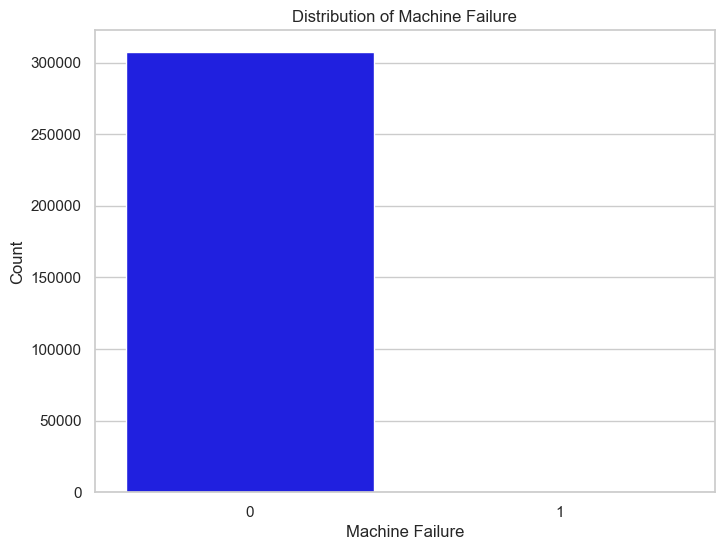

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the style
sns.set(style="whitegrid")

# Distribution of Equipment Failure
plt.figure(figsize=(8, 6))
sns.countplot(x='MACHINE_FAILURE', data=combined_df, palette=['blue'])
plt.title('Distribution of Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Count')
plt.show()


The bar chart shows the distribution of machine failures across the dataset, highlighting a significant class imbalance. Over 99% of records are no machines failure while 0.14% or records show machine failures.

BOX PLOTS OF SENSOR DATA DISTRIBUTIONS

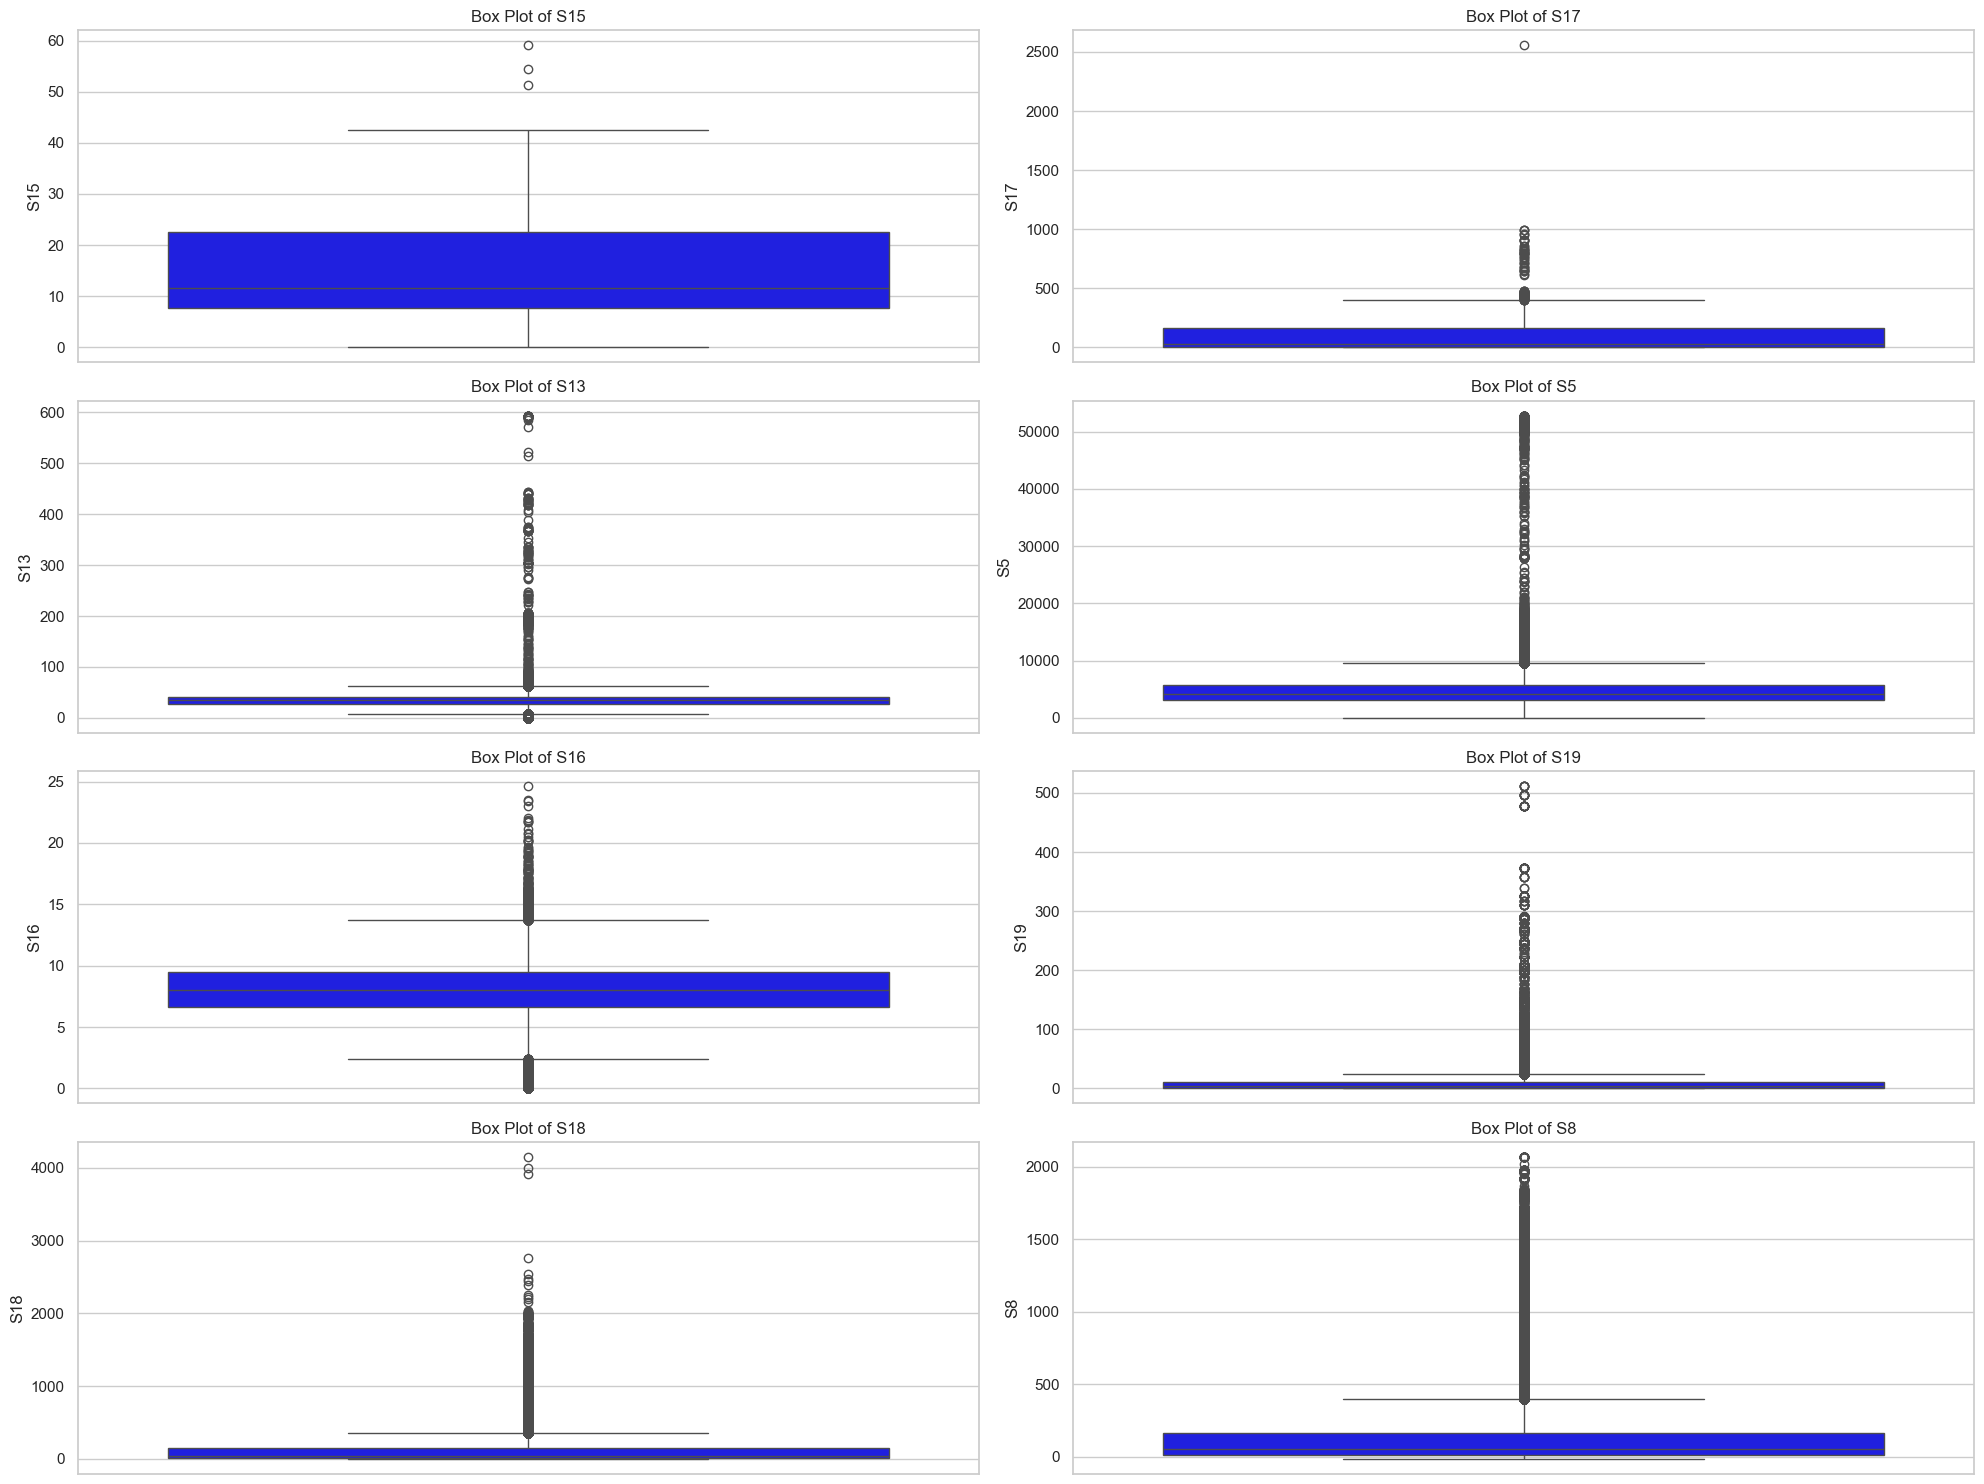

In [6]:
# Box Plots for Sensor Data Outliers
sensor_features = ['S15', 'S17', 'S13', 'S5', 'S16', 'S19', 'S18', 'S8']
plt.figure(figsize=(20, 15))
for i, feature in enumerate(sensor_features):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(y=feature, data=combined_df, color='blue')
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


The box plots for sensors S15, S17, S13, S5, S16, S19, S18, and S8 show the distribution of sensor readings, highlighting the interquartile ranges and the presence of outliers. Most sensors have numerous outliers with a large variability in the sensor data. As in the above plot that S17 and S5 have substantial outliers, which may affect the performance of model.

FREQUENCY DISTRIBUTIONS OF SENSOR DATA

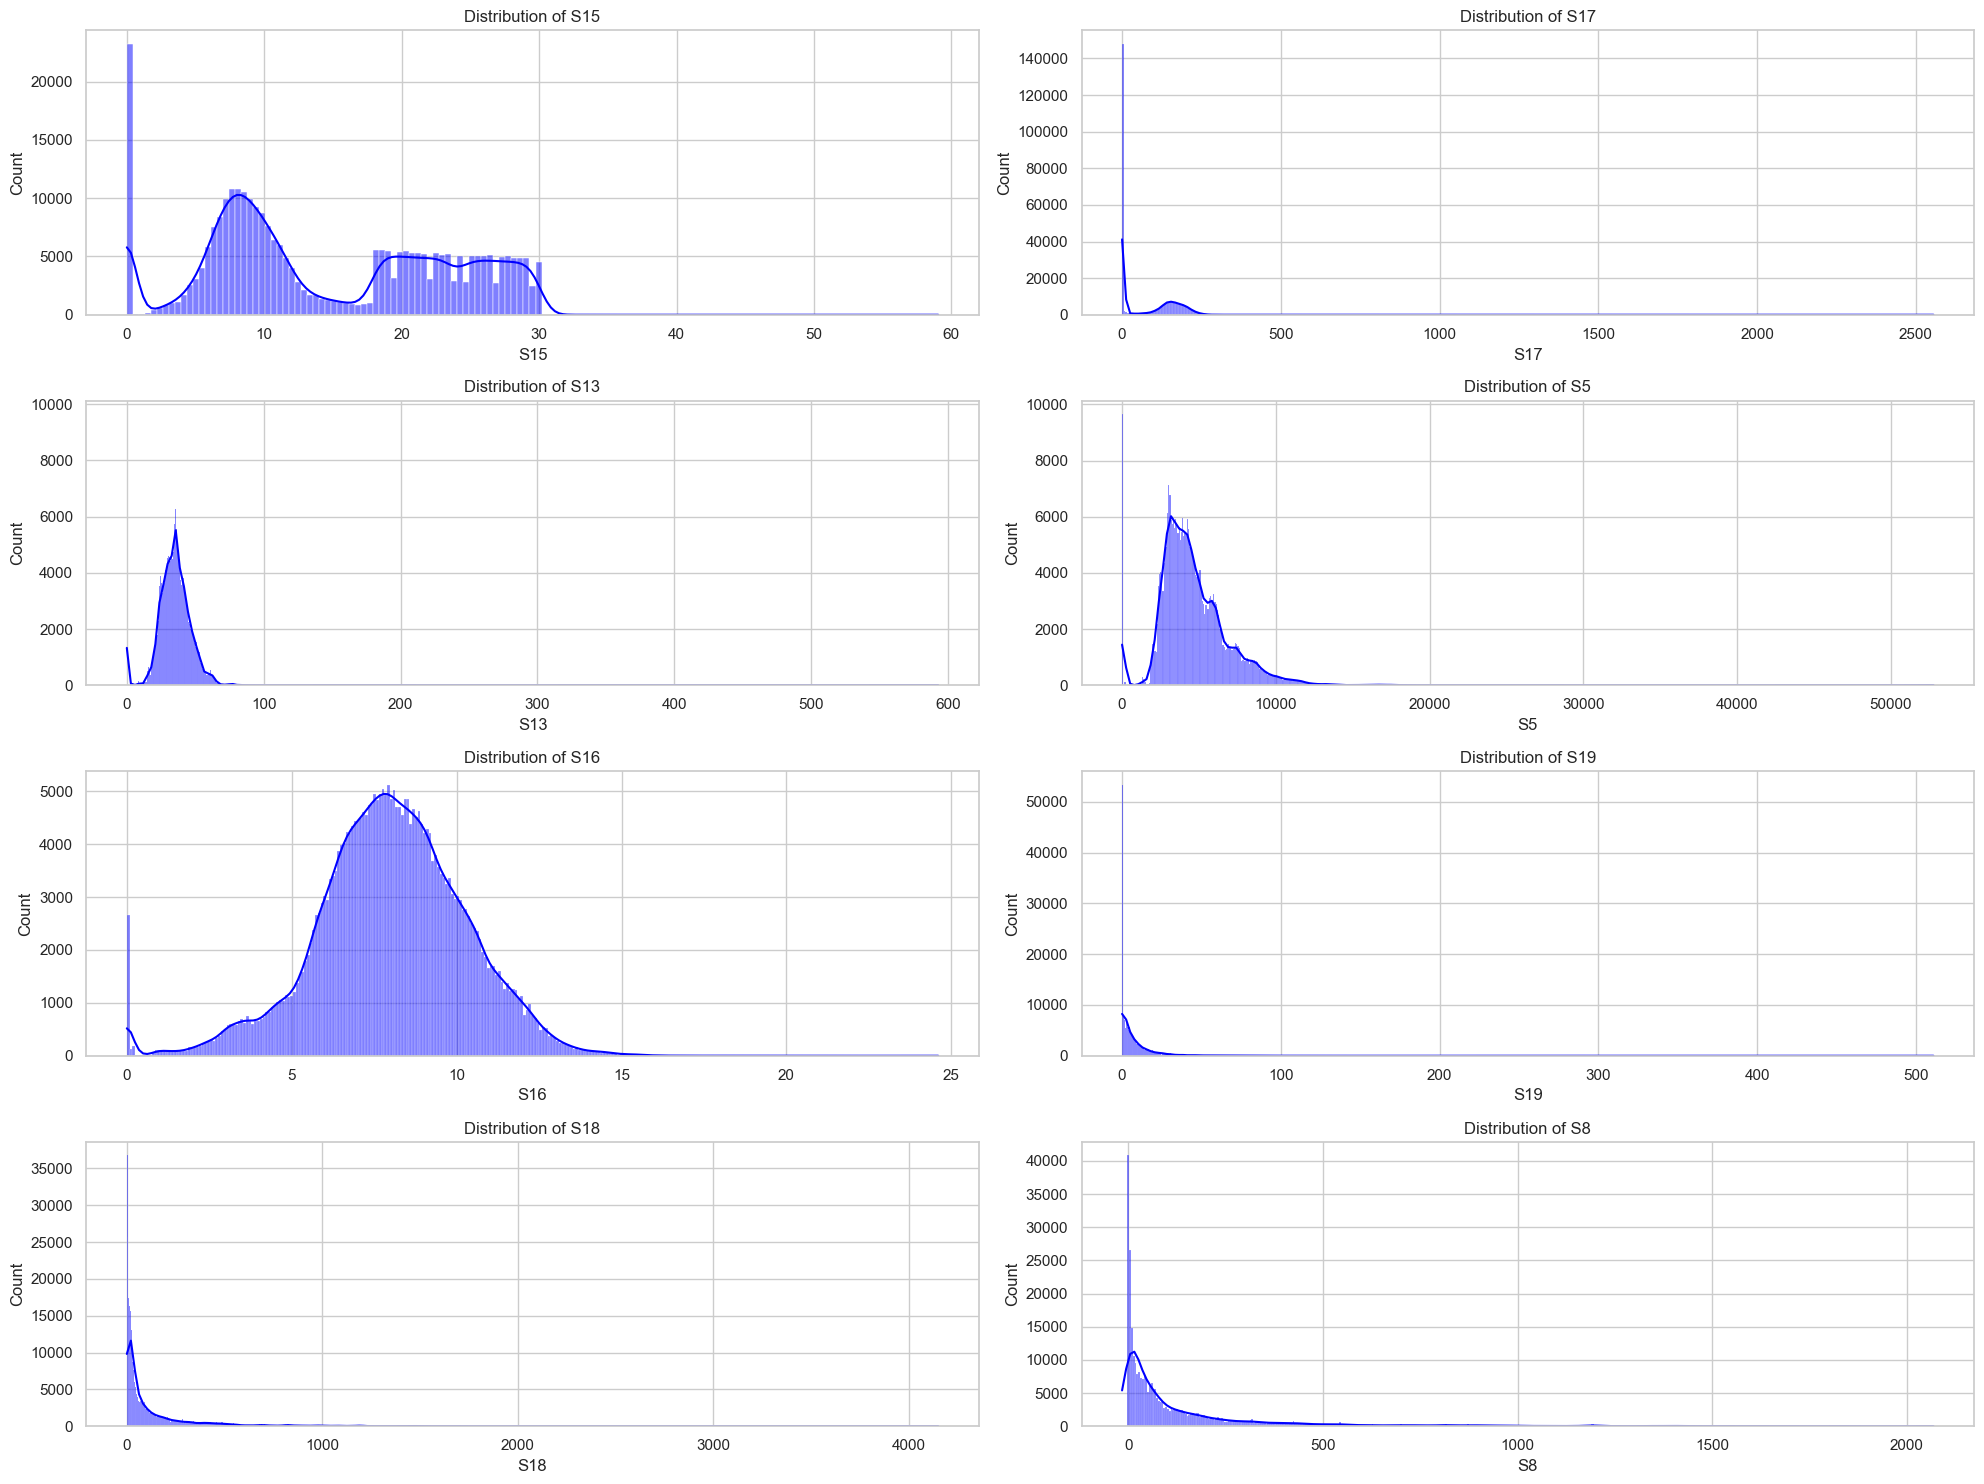

In [ ]:
# Histograms and Density Plots for Sensor Data
plt.figure(figsize=(20, 15))
for i, feature in enumerate(sensor_features):
    plt.subplot(4, 2, i + 1)
    sns.histplot(combined_df[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


The histogram shows the frequency distributions of sensor readings, for S15, S17, S13, S5, S16, S19, S18, and S8. S15 then has bimodal distribution, with modes at 0 and around 10-20, that being two of the common value ranges. Right-skew distributions, in which most of the values lumped near 0 and long tails stretching towards higher values, are the same for S17, S13, S5, S19, S18 and S8. S16 shows a more normal-like distribution with most values between 5 and 10. These distributions highlight the variability and skewness in the sensor data, indicating the presence of outliers.

CORRELATION MATRIX HEATMAP

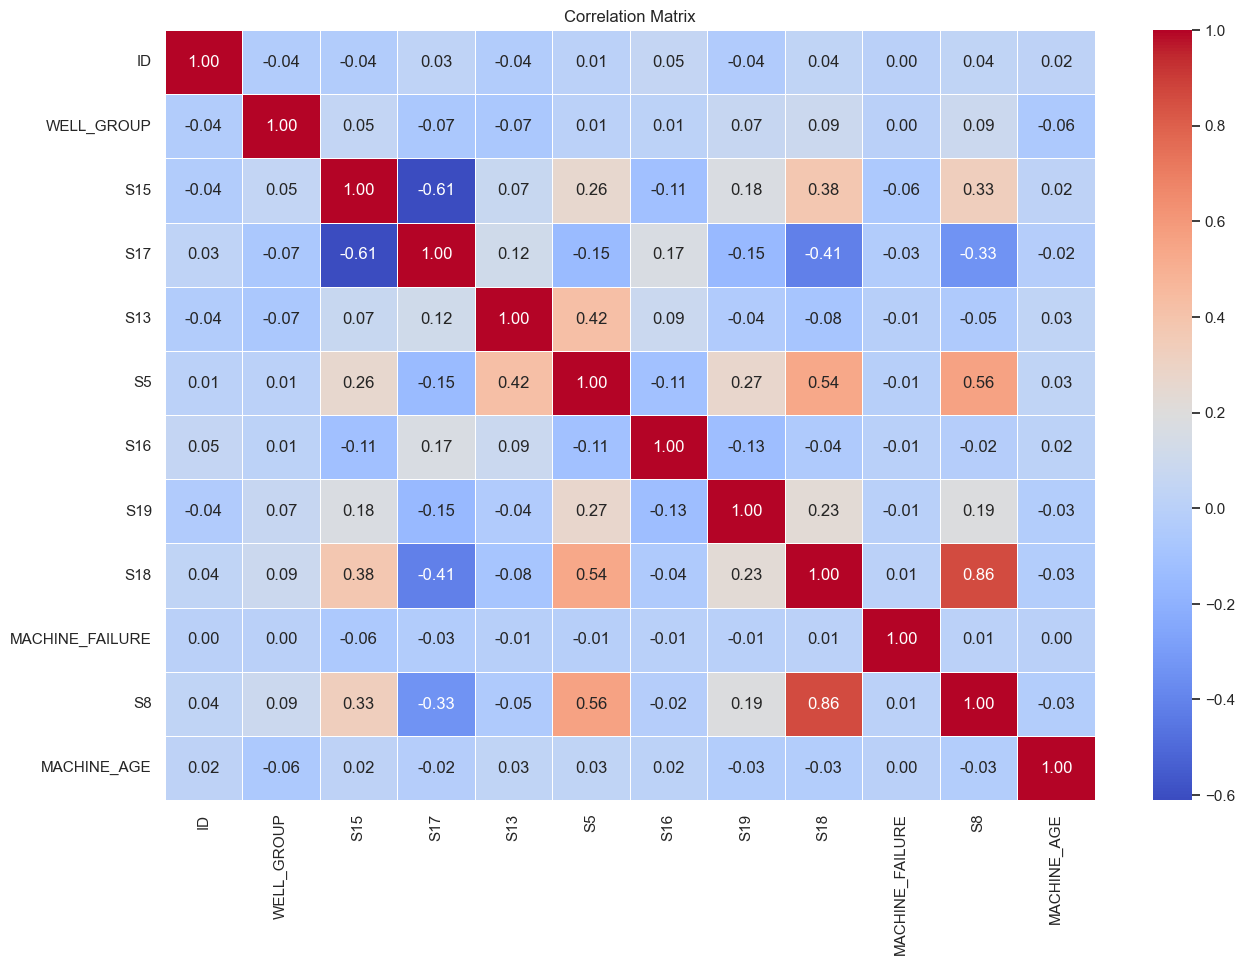

In [ ]:
# Filter numeric columns
numeric_df = combined_df.select_dtypes(include=[float, int])

# Correlation Matrix Heatmap
plt.figure(figsize=(15, 10))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()





The correlation matrix displays the relationships between various features in the dataset, with values ranging from -1 to 1. Positive correlations are shown in shades of red, while negative correlations are in shades of blue. Notable observations include a strong positive correlation between S5 and S18 (0.86), suggesting they measure similar phenomena, and a moderate positive correlation between S5 and S13 (0.54). S15 and S17 exhibit a strong negative correlation (-0.61), indicating that as one increases, the other decreases. MACHINE_FAILURE has very low correlations with other variables, implying that it may be influenced by a combination of factors rather than any single sensor reading. Additionally, variables like WELL_GROUP and AGE_OF_EQUIPMENT show minimal correlation with most sensor readings. This matrix helps identify related variables and guides feature selection and engineering steps in the modeling process.

DISTRIBUTION OF AGE OF EQUIPMENT BY MACHINE FAILURE

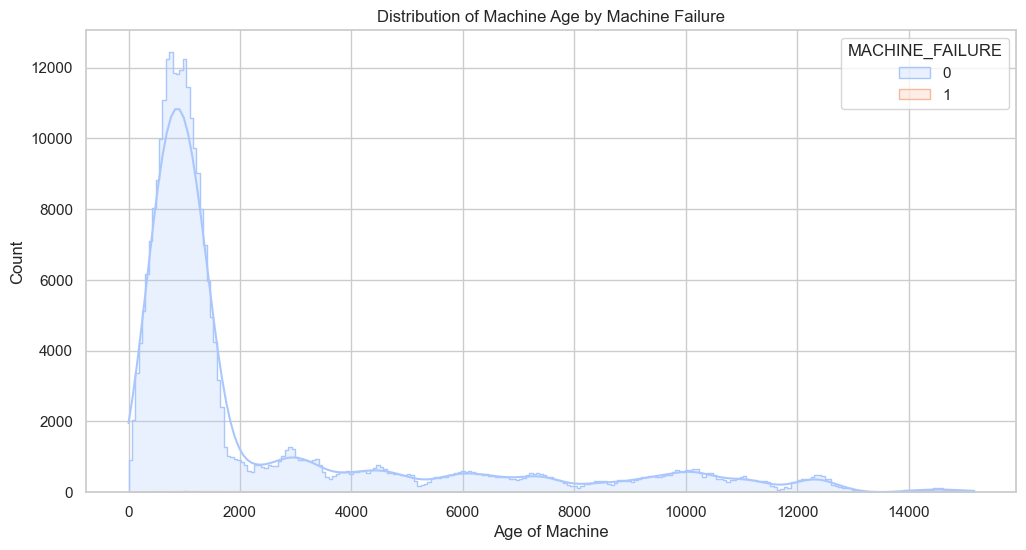

In [ ]:
# Distribution of AGE_OF_MACHINES by Equipment Failure
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='MACHINE_AGE', hue='MACHINE_FAILURE', kde=True, element='step', palette='coolwarm')
plt.title('Distribution of Machine Age by Machine Failure')
plt.xlabel('Age of Machine')
plt.ylabel('Count')
plt.show()


The histogram shows the distribution of machine ages with respect to machine failures. Machines without failures (labeled as 0) are represented in blue, while machines with failures (labeled as 1) are in orange. The plot reveals that most machines, whether they fail or not, are relatively young, with a high concentration of machines aged between 0 and 2000 days. The frequency of machine failures appears to be more evenly distributed across different ages, though still most common in younger machines. This suggests that while failures do occur at various ages, the majority of the dataset consists of newer machines, and failures are less frequent as machines age. The relatively low number of older machines indicates that they might either be less prone to failure or have already been replaced.

### 2.4 OUTLIERS REMOVAL 

In [ ]:
from scipy import stats
import numpy as np

# Function to remove outliers using Z-score method
def remove_outliers_zscore(combined_df, features, threshold=3):
    z_scores = stats.zscore(combined_df[features])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < threshold).all(axis=1)
    return combined_df[filtered_entries]

# List of sensor features
sensor_features = ['S15', 'S17', 'S13', 'S5', 'S16', 'S19', 'S18', 'S8']

# Remove outliers from sensor data using Z-score method
df_cleaned = remove_outliers_zscore(combined_df, sensor_features)

# Verify the change
print("Data shape before removing outliers:", combined_df.shape)
print("Data shape after removing outliers:", df_cleaned.shape)

Data shape before removing outliers: (307751, 16)
Data shape after removing outliers: (287637, 16)


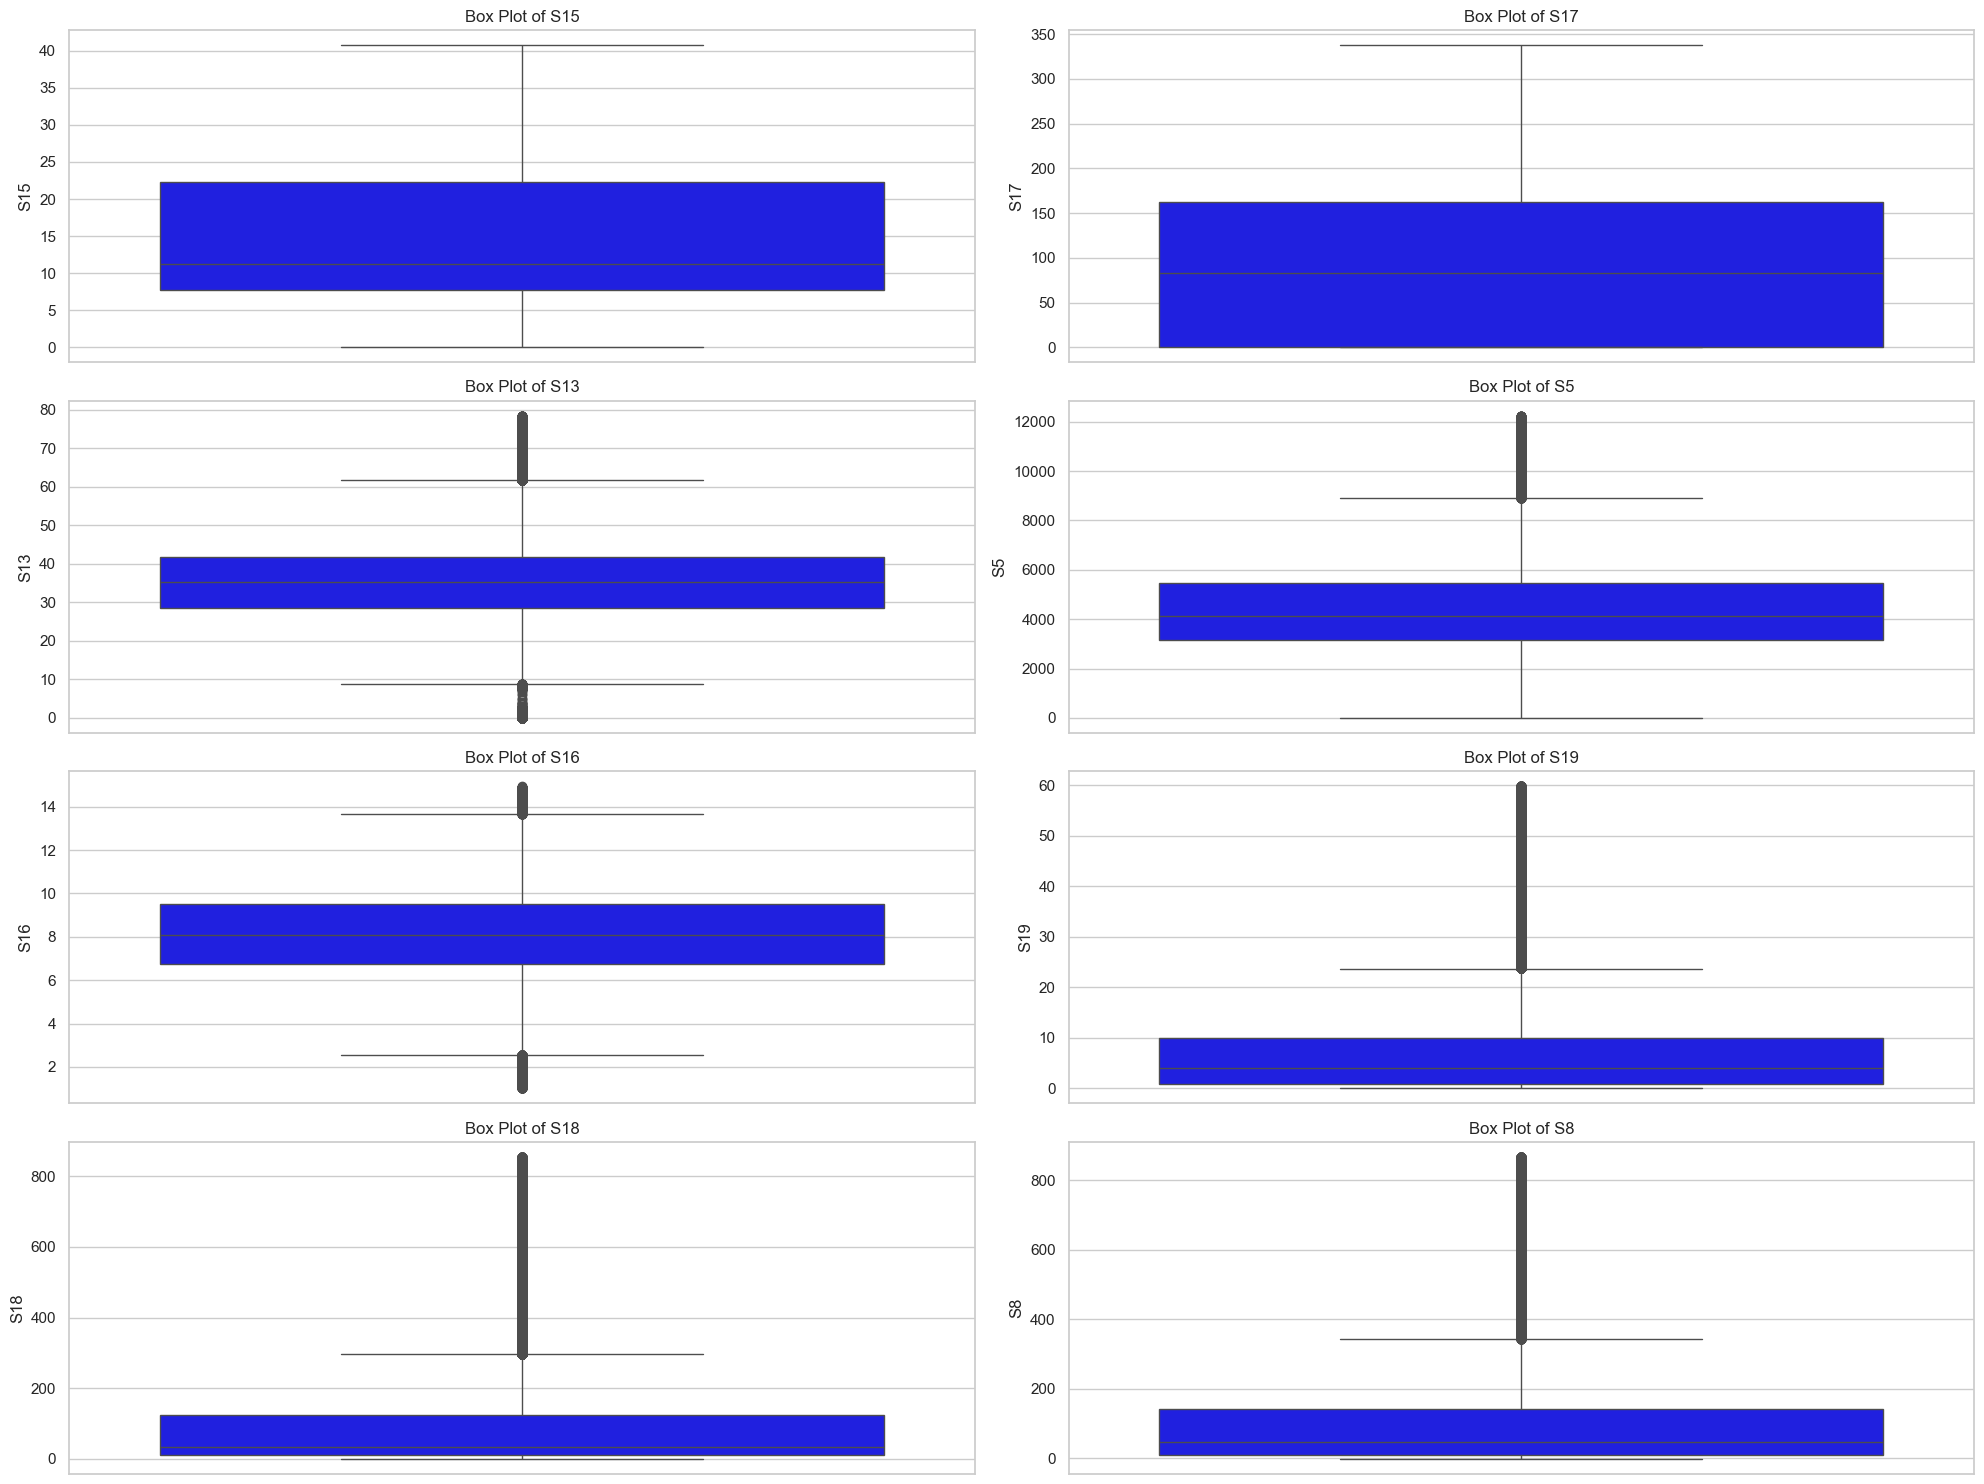

In [ ]:
# Box Plots for Sensor Data after Outliers Removal
sensor_features = ['S15', 'S17', 'S13', 'S5', 'S16', 'S19', 'S18', 'S8']
plt.figure(figsize=(20, 15))
for i, feature in enumerate(sensor_features):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(y=feature, data=df_cleaned, color='blue')
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


The data shape has changed from 307,751 entries to 287,637 entries after removing outliers, indicating that 20,114 outliers were removed. This significant reduction in the number of entries demonstrates the presence of substantial outliers in the dataset. The outliers were identified and removed using the Z-score method with a threshold of 3. This threshold was chosen because it aligns with the three-sigma rule in statistics, which states that in a normal distribution, approximately 99.7% of data points lie within three standard deviations from the mean. By applying this threshold, effectively filter out extreme values that are likely to distort the results of analysis and modeling, ensuring the integrity and quality of the data.

GENERAL INFORMATION AND DESCRIPTIVE STATISTICS AFTER OUTLIERS REMOVAL

In [ ]:
print("General Information After Cleaning:\n", df_cleaned.info())
print("Descriptive Statistics After Cleaning:\n", df_cleaned.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 287637 entries, 0 to 307750
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  287637 non-null  int64  
 1   DATE                287637 non-null  object 
 2   REGION_CLUSTER      287637 non-null  object 
 3   MAINTENANCE_VENDOR  287637 non-null  object 
 4   MANUFACTURER        287637 non-null  object 
 5   WELL_GROUP          287637 non-null  int64  
 6   S15                 287637 non-null  float64
 7   S17                 287637 non-null  float64
 8   S13                 287637 non-null  float64
 9   S5                  287637 non-null  float64
 10  S16                 287637 non-null  float64
 11  S19                 287637 non-null  float64
 12  S18                 287637 non-null  float64
 13  MACHINE_FAILURE     287637 non-null  int64  
 14  S8                  287637 non-null  float64
 15  MACHINE_AGE         287637 non-null  in

### 2.5 ENCODING CATEGORICAL VARIABLES

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Encoding Categorical Variables
categorical_features = ['REGION_CLUSTER', 'MAINTENANCE_VENDOR', 'MANUFACTURER']
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical = encoder.fit_transform(df_cleaned[categorical_features])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))
df_encoded = pd.concat([df_cleaned.reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)
df_encoded.drop(categorical_features, axis=1, inplace=True)

# Print the first few rows of the
print(df_encoded.head())

       ID        DATE  WELL_GROUP        S15         S17    S13      S5  \
0  100001  02/12/2014           1  11.088000  145.223448  39.34  3501.0   
1  100001  03/12/2014           1   8.877943  187.573214  39.20  3489.0   
2  100001  04/12/2014           1   8.676444  148.363704  38.87  3459.0   
3  100001  05/12/2014           1   9.988338  133.660000  39.47  3513.0   
4  100001  06/12/2014           1   8.475264  197.181600  40.33  3589.0   

        S16  S19        S18  ...  MANUFACTURER_Q  MANUFACTURER_R  \
0  8.426869  1.9  24.610345  ...             0.0             0.0   
1  6.483714  1.9  24.671429  ...             0.0             0.0   
2  6.159659  2.0  24.733333  ...             0.0             0.0   
3  9.320308  2.0  24.773077  ...             0.0             0.0   
4  8.022960  1.5  24.808000  ...             0.0             0.0   

   MANUFACTURER_S  MANUFACTURER_T  MANUFACTURER_U  MANUFACTURER_V  \
0             0.0             0.0             0.0             0.0   
1 

One-hot encoding is a crucial preprocessing step in machine learning to convert categorical variables into a numerical format without implying any ordinal relationship. Using one-hot encoding, categorical features like REGION_CLUSTER, MAINTENANCE_VENDOR, and MANUFACTURER are transformed into multiple binary columns. This approach avoids introducing any implicit ordinal relationships, ensuring that each category is represented independently. 

In [ ]:
print("General Information After Cleaning:\n", df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287637 entries, 0 to 287636
Data columns (total 39 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    287637 non-null  int64  
 1   DATE                  287637 non-null  object 
 2   WELL_GROUP            287637 non-null  int64  
 3   S15                   287637 non-null  float64
 4   S17                   287637 non-null  float64
 5   S13                   287637 non-null  float64
 6   S5                    287637 non-null  float64
 7   S16                   287637 non-null  float64
 8   S19                   287637 non-null  float64
 9   S18                   287637 non-null  float64
 10  MACHINE_FAILURE       287637 non-null  int64  
 11  S8                    287637 non-null  float64
 12  MACHINE_AGE           287637 non-null  int64  
 13  REGION_CLUSTER_A      287637 non-null  float64
 14  REGION_CLUSTER_B      287637 non-null  float64
 15  

In [ ]:
df_encoded.head()

,ID,DATE,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,...,MANUFACTURER_Q,MANUFACTURER_R,MANUFACTURER_S,MANUFACTURER_T,MANUFACTURER_U,MANUFACTURER_V,MANUFACTURER_W,MANUFACTURER_X,MANUFACTURER_Y,MANUFACTURER_Z
0,100001,02/12/2014,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,100001,03/12/2014,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,100001,04/12/2014,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,100001,05/12/2014,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,100001,06/12/2014,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 2.6 STANDARIZATION 

In [ ]:
from sklearn.preprocessing import StandardScaler
#Standization
scaler = StandardScaler()
numerical_features = sensor_features + ['MACHINE_AGE']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [ ]:
df_encoded.head()

,ID,DATE,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,...,MANUFACTURER_Q,MANUFACTURER_R,MANUFACTURER_S,MANUFACTURER_T,MANUFACTURER_U,MANUFACTURER_V,MANUFACTURER_W,MANUFACTURER_X,MANUFACTURER_Y,MANUFACTURER_Z
0,100001,02/12/2014,1,-0.375676,0.715253,0.372781,-0.490635,0.155800,-0.571490,-0.515119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,100001,03/12/2014,1,-0.630187,1.212143,0.360572,-0.496987,-0.745514,-0.571490,-0.514715,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,100001,04/12/2014,1,-0.653392,0.752098,0.331795,-0.512865,-0.895824,-0.561162,-0.514306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,100001,05/12/2014,1,-0.502314,0.579579,0.384117,-0.484284,0.570213,-0.561162,-0.514043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,100001,06/12/2014,1,-0.676560,1.324879,0.459114,-0.444058,-0.031550,-0.612804,-0.513811,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Standardization is crucial to ensure that the deep learning models algorithms that been used for this predictive maintenance study are not biased by features with larger scales. By standardizing the sensor readings and machine age, it enhance the model's ability to learn patterns effectively and make accurate predictions regarding machine failures. This preprocessing step is an essential part of the data preparation pipeline, ensuring that the input data is in a suitable format for machine learning models.

### 2.7 FEATURE SELECTION

2.7.1 RECURSIVE FEATURE ELIMINATION (RFE)

In [ ]:
import pandas as pd

# Load your dataset
df = df_encoded

# Separate the target variable
X = df.drop(columns=['MACHINE_FAILURE', 'DATE', 'ID'])
y = df['MACHINE_FAILURE']


                 Feature  Importance
9            MACHINE_AGE    0.160302
5                    S16    0.128495
4                     S5    0.119526
3                    S13    0.115223
8                     S8    0.111656
7                    S18    0.080959
6                    S19    0.055353
1                    S15    0.033784
0             WELL_GROUP    0.031576
10      REGION_CLUSTER_A    0.009132
11      REGION_CLUSTER_B    0.008378
2                    S17    0.008355
29        MANUFACTURER_T    0.007264
19  MAINTENANCE_VENDOR_J    0.007247
33        MANUFACTURER_X    0.006808
18  MAINTENANCE_VENDOR_I    0.006772
23  MAINTENANCE_VENDOR_N    0.006608
21  MAINTENANCE_VENDOR_L    0.006598
30        MANUFACTURER_U    0.006584
28        MANUFACTURER_S    0.006347
25  MAINTENANCE_VENDOR_P    0.006159
20  MAINTENANCE_VENDOR_K    0.005987
14      REGION_CLUSTER_E    0.005942
26        MANUFACTURER_Q    0.005882
12      REGION_CLUSTER_C    0.005868
22  MAINTENANCE_VENDOR_M    0.005778
3

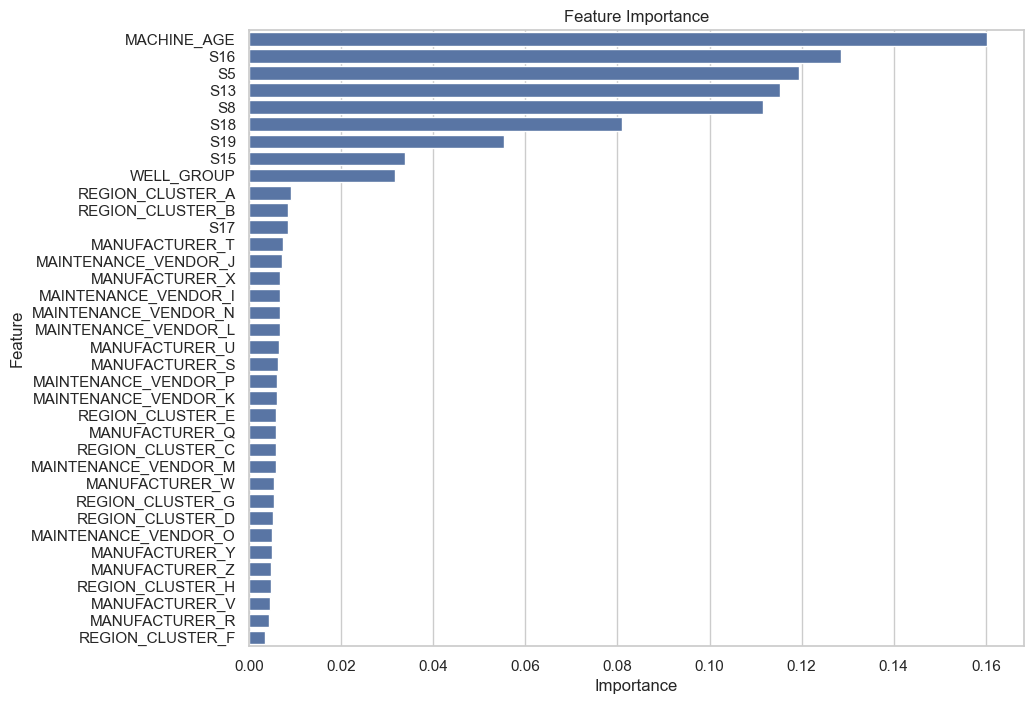

Selected features based on feature importance: ['MACHINE_AGE', 'S16', 'S5', 'S13', 'S8', 'S18', 'S19', 'S15', 'WELL_GROUP']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the results
print(feature_importance_df)

# Plot feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# Select features based on importance threshold
importance_threshold = 0.01  # Adjust this threshold as needed
selected_features_importance = feature_importance_df[feature_importance_df['Importance'] > importance_threshold]['Feature'].tolist()
print(f"Selected features based on feature importance: {selected_features_importance}")


In this process, feature importance analysis was performed using a Random Forest classifier to identify the most significant features for predicting machine failure. The Random Forest algorithm, an ensemble method based on decision trees, provides an importance score for each feature, indicating its relevance in making accurate predictions. By plotting these importance scores, can visualize and rank the features. The selected threshold of 0.01 ensures that only features with substantial importance are retained, simplifying the model and focusing on the most predictive variables. The outcome of this analysis identified 'MACHINE_AGE', 'S16', 'S5', 'S13', 'S8', 'S18', 'S19', 'S15', and 'WELL_GROUP' as the most important features, which will be used in subsequent modeling steps.

2.7.2 ANALYSIS OF VARIANCE (ANOVA) TEST

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Assuming df is your one-hot encoded DataFrame

# Separate the features and target variable
X = df.drop(columns=['MACHINE_FAILURE', 'DATE', 'ID'])
y = df['MACHINE_FAILURE']

# Apply ANOVA
anova_selector = SelectKBest(f_classif, k='all')
anova_selector.fit(X, y)

# Get the F-values and p-values
anova_scores = pd.DataFrame({'Feature': X.columns, 'F-value': anova_selector.scores_, 'p-value': anova_selector.pvalues_})
anova_scores = anova_scores.sort_values(by='F-value', ascending=False)

# Display the results
print(anova_scores)

# Select features based on p-value threshold
p_value_threshold = 0.05
selected_features_anova = anova_scores[anova_scores['p-value'] < p_value_threshold]['Feature'].tolist()
print(f"Selected features based on ANOVA: {selected_features_anova}")


                 Feature     F-value        p-value
1                    S15  986.062285  4.474778e-216
2                    S17  351.139810   2.665014e-78
3                    S13   42.116621   8.612813e-11
6                    S19   33.896594   5.818181e-09
4                     S5   28.032537   1.193800e-07
7                    S18   27.723526   1.400505e-07
8                     S8   19.323320   1.103898e-05
5                    S16    0.896561   3.437062e-01
21  MAINTENANCE_VENDOR_L    0.450542   5.020781e-01
22  MAINTENANCE_VENDOR_M    0.273238   6.011681e-01
18  MAINTENANCE_VENDOR_I    0.243437   6.217352e-01
20  MAINTENANCE_VENDOR_K    0.214171   6.435181e-01
16      REGION_CLUSTER_G    0.190071   6.628582e-01
23  MAINTENANCE_VENDOR_N    0.158893   6.901782e-01
33        MANUFACTURER_X    0.151502   6.971042e-01
34        MANUFACTURER_Y    0.138476   7.098009e-01
19  MAINTENANCE_VENDOR_J    0.110954   7.390606e-01
29        MANUFACTURER_T    0.061653   8.039028e-01
13      REGI


In this process, feature selection using ANOVA (Analysis of Variance) was performed to identify the features with the most significant relationship to the target variable, MACHINE_FAILURE. By applying the SelectKBest method with the f_classif function, the F-values and p-values was computed for each feature, ranking them by their statistical significance. The features with p-values below the threshold of 0.05 were selected, indicating a strong association with the target variable. This resulted in the selection of features: S15, S17, S13, S19, S5, S18, and S8. 

In [ ]:
# RFE selected features
rfe_selected_features = selected_features_importance

# ANOVA selected features
anova_selected_features = selected_features_anova

# Combine the features from both methods
combined_features = list(set(rfe_selected_features + anova_selected_features))
print(f"Combined selected features: {combined_features}")


Combined selected features: ['S13', 'S19', 'S15', 'S5', 'S18', 'MACHINE_AGE', 'WELL_GROUP', 'S8', 'S16', 'S17']


The features selected through Recursive Feature Elimination (RFE) and ANOVA were combines to ensure a robust feature set for our predictive model. The RFE method selected features based on their importance in the model, while ANOVA identified features with strong statistical relationships to the target variable. By merging these two sets, obtained a combined list of features: S13, MACHINE_AGE, S17, S5, S18, WELL_GROUP, S15, S19, S8, and S16. This combined feature set leverages both statistical significance and model relevance, enhancing the model's predictive power and ensuring that only the most impactful features are used in further analysis and modeling steps.

Feature selection has identified that the features ['S13', 'MACHINE_AGE', 'S17', 'S5', 'S18', 'WELL_GROUP', 'S15', 'S19', 'S8', 'S16'] have high importance, while others have lower importance. However, for deep learning models to work effectively, all features must be in a suitable numerical format. Additionally, standardizing the numerical features ensures they are on a similar scale, which helps improve the model's performance and training stability. This preprocessing step is fundamental to preparing the data for effective and accurate training of RNN, CNN, and LSTM models, ultimately enhancing the model's ability to learn and generalize from the data.

### 2.8 SAVE ENCODED DATASET

In [ ]:
import pandas as pd

# Assuming df_encoded is your DataFrame
df = df_encoded.copy()

# Get the list of columns
columns = list(df.columns)

# Remove the MACHINE_FAILURE column
columns.remove('MACHINE_FAILURE')

# Append the MACHINE_FAILURE column at the end
columns.append('MACHINE_FAILURE')

# Reorder the DataFrame
df = df[columns]

# Verify the structure
print(df.head())
print(df.columns)

# Save the DataFrame to a CSV file
df.to_csv(r'C:\Users\heroa\Desktop\Master\Sem 2\P1\DATASET\encoded_machine_failure_data.csv', index=False)

# Read back the CSV to verify the column order
df_verification = pd.read_csv(r'C:\Users\heroa\Desktop\Master\Sem 2\P1\DATASET\encoded_machine_failure_data.csv')
print(df_verification.head())
print(df_verification.columns)




       ID        DATE  WELL_GROUP       S15       S17       S13        S5  \
0  100001  02/12/2014           1 -0.375676  0.715253  0.372781 -0.490635   
1  100001  03/12/2014           1 -0.630187  1.212143  0.360572 -0.496987   
2  100001  04/12/2014           1 -0.653392  0.752098  0.331795 -0.512865   
3  100001  05/12/2014           1 -0.502314  0.579579  0.384117 -0.484284   
4  100001  06/12/2014           1 -0.676560  1.324879  0.459114 -0.444058   

        S16       S19       S18  ...  MANUFACTURER_R  MANUFACTURER_S  \
0  0.155800 -0.571490 -0.515119  ...             0.0             0.0   
1 -0.745514 -0.571490 -0.514715  ...             0.0             0.0   
2 -0.895824 -0.561162 -0.514306  ...             0.0             0.0   
3  0.570213 -0.561162 -0.514043  ...             0.0             0.0   
4 -0.031550 -0.612804 -0.513811  ...             0.0             0.0   

   MANUFACTURER_T  MANUFACTURER_U  MANUFACTURER_V  MANUFACTURER_W  \
0             0.0             0.0  

In [ ]:
#Save the DataFrame to a CSV file
df_cleaned.to_csv(r'C:\Users\heroa\Desktop\Master\Sem 2\P1\DATASET\cleaned_machine_failure_data.csv', index=False)

### 2.9 SAVE SELECTED FEATURES DATASET

In [ ]:
# List of important features identified
important_features = ['MACHINE_AGE', 'S16', 'S5', 'S13', 'S8', 'S18', 'S19', 'S15', 'WELL_GROUP', 'MACHINE_FAILURE', 'DATE', 'ID']

# Filter the DataFrame to retain only the important features
filtered_df = df_cleaned[important_features]

# Verify the new DataFrame structure
print(filtered_df.head())

# Save the filtered dataset to a CSV file
filtered_df.to_csv(r'C:\Users\heroa\Desktop\Master\Sem 2\P1\DATASET\filtered_machine_failure_data.csv', index=False)


   MACHINE_AGE       S16      S5    S13   S8        S18  S19        S15  \
0          880  8.426869  3501.0  39.34  0.0  24.610345  1.9  11.088000   
1          881  6.483714  3489.0  39.20  0.0  24.671429  1.9   8.877943   
2          882  6.159659  3459.0  38.87  0.0  24.733333  2.0   8.676444   
3          883  9.320308  3513.0  39.47  0.0  24.773077  2.0   9.988338   
4          884  8.022960  3589.0  40.33  0.0  24.808000  1.5   8.475264   

   WELL_GROUP  MACHINE_FAILURE        DATE      ID  
0           1                0  02/12/2014  100001  
1           1                0  03/12/2014  100001  
2           1                0  04/12/2014  100001  
3           1                0  05/12/2014  100001  
4           1                0  06/12/2014  100001  


In [ ]:
# Display the first few rows of the DataFrame
print(df.head())

# Display the column names and their data types
print(df.info())


       ID        DATE  WELL_GROUP       S15       S17       S13        S5  \
0  100001  02/12/2014           1 -0.375676  0.715253  0.372781 -0.490635   
1  100001  03/12/2014           1 -0.630187  1.212143  0.360572 -0.496987   
2  100001  04/12/2014           1 -0.653392  0.752098  0.331795 -0.512865   
3  100001  05/12/2014           1 -0.502314  0.579579  0.384117 -0.484284   
4  100001  06/12/2014           1 -0.676560  1.324879  0.459114 -0.444058   

        S16       S19       S18  ...  MANUFACTURER_R  MANUFACTURER_S  \
0  0.155800 -0.571490 -0.515119  ...             0.0             0.0   
1 -0.745514 -0.571490 -0.514715  ...             0.0             0.0   
2 -0.895824 -0.561162 -0.514306  ...             0.0             0.0   
3  0.570213 -0.561162 -0.514043  ...             0.0             0.0   
4 -0.031550 -0.612804 -0.513811  ...             0.0             0.0   

   MANUFACTURER_T  MANUFACTURER_U  MANUFACTURER_V  MANUFACTURER_W  \
0             0.0             0.0  